In [1]:
import networkx as nx
import pandas as pd

In [2]:
G = nx.DiGraph()

In [3]:
df = pd.read_parquet('df_edge_list_directed_users_combined_postings_replies_and_votes_to_postings_net_and_follow_connections.parquet')

In [4]:
import json

with open('users_roles.json','r') as f:
    user_roles = json.loads(f.read())

In [5]:
user_roles = dict(sorted(user_roles.items(), key=lambda item: len(item[1]),reverse=True))

In [6]:
all_users_with_roles = set()
for role, users in user_roles.items():
    all_users_with_roles.update(users)
    for user in users:
        G.add_node(user, role = role)

In [7]:
dff = df.loc[(df.ID_CommunityIdentity_Source.isin(all_users_with_roles)) & (df.ID_CommunityIdentity_Target.isin(all_users_with_roles))]

In [9]:
G.add_weighted_edges_from(zip(dff['ID_CommunityIdentity_Source'].to_list(),dff['ID_CommunityIdentity_Target'].to_list(),dff['weight_total'].to_list()))

In [49]:
comms = nx.community.louvain_communities(G,resolution = 6, seed=123)

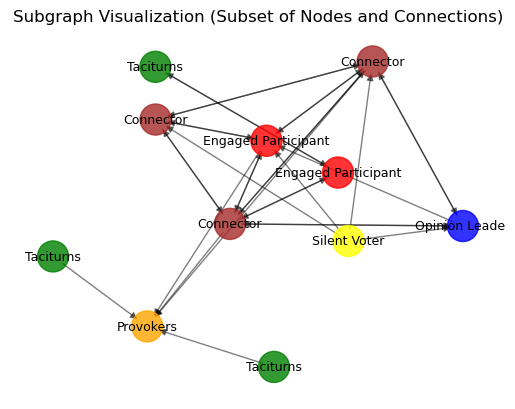

In [51]:
import matplotlib.pyplot as plt

connections = comms[1]  # Start with subset nodes

# Create a subgraph with these nodes and their connections
subgraph = G.subgraph(connections)

# Visualization function
def visualize_subgraph(subgraph, highlight_nodes=None):
    pos = nx.spring_layout(subgraph,k = 8)  # Layout for positioning nodes

    role_colors = {
    'Engaged Participant': 'red',
    'Opinion Leader': 'blue',
    'Taciturns': 'green',
    'Provokers': 'orange',
    'Flamers': 'purple',
    'Connector': 'brown',
    'Discussion Leader': 'pink',
    'Silent Voter': 'yellow',
    }

    # Draw all nodes in the subgraph
    node_colors = [role_colors[G.nodes[node]['role']] for node in subgraph.nodes]
    nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=500, alpha=0.8)

    # Draw all edges in the subgraph
    nx.draw_networkx_edges(subgraph, pos, alpha=0.5, width=1)

    # Draw labels
    labels = {node: G.nodes[node]['role'] for node in subgraph.nodes}
    nx.draw_networkx_labels(subgraph, pos, labels, font_size=9, font_color="black")

    # Display the graph
    plt.title("Subgraph Visualization (Subset of Nodes and Connections)")
    plt.axis('off')
    plt.show()

# Call the visualization function
visualize_subgraph(subgraph)

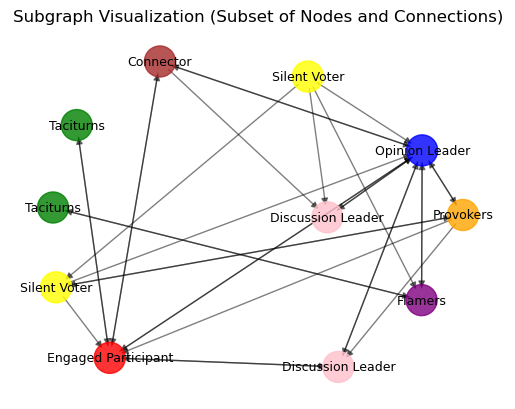

In [73]:
visualize_subgraph(G.subgraph(comms[4]))

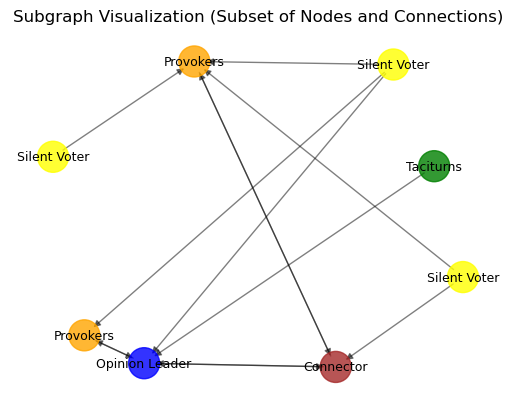

In [77]:
visualize_subgraph(G.subgraph(comms[13]))

In [79]:
nx.write_gexf(G.subgraph(comms[4]), "subgraph.gexf")


In [80]:
nx.write_gexf(G.subgraph(comms[13]), "subgraph2.gexf")

0


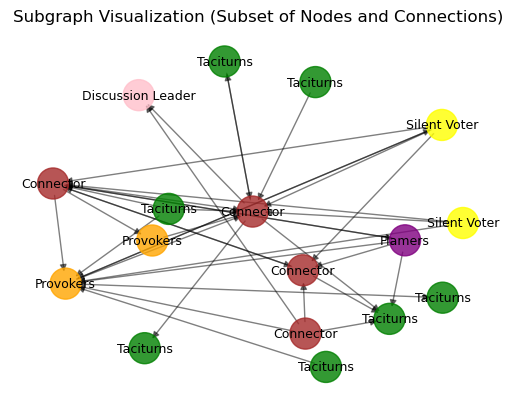

1


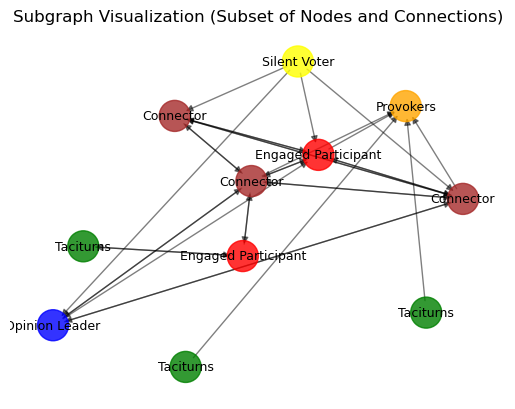

2


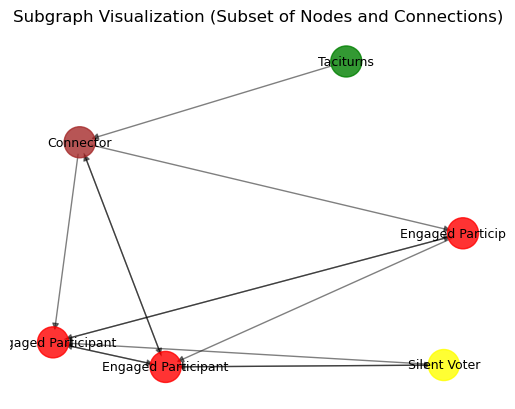

3


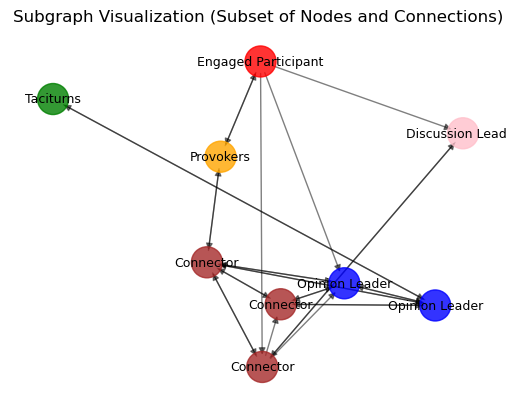

4


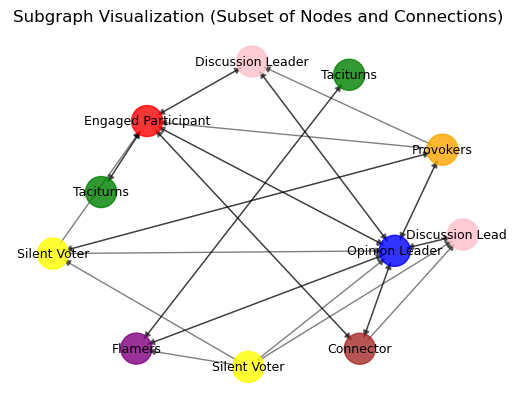

5


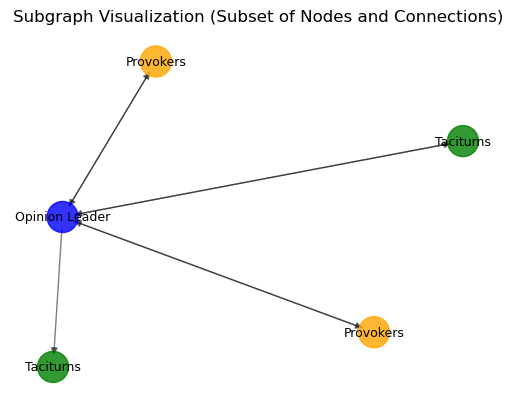

6


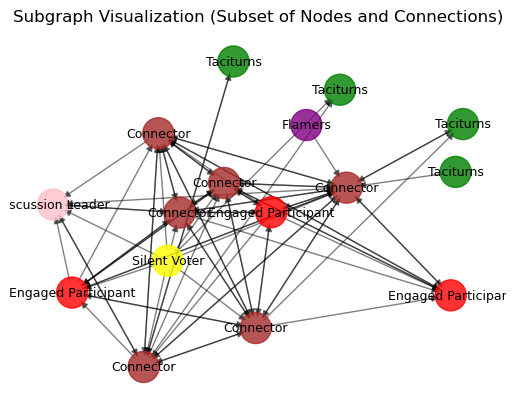

7


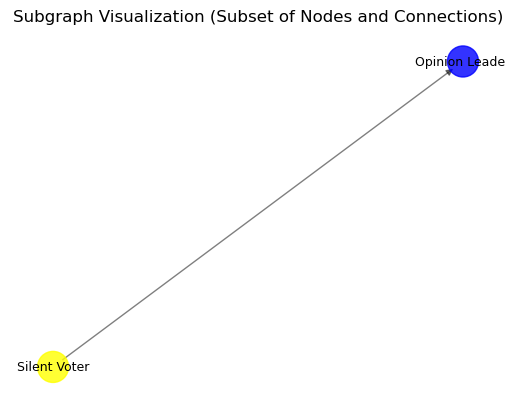

8


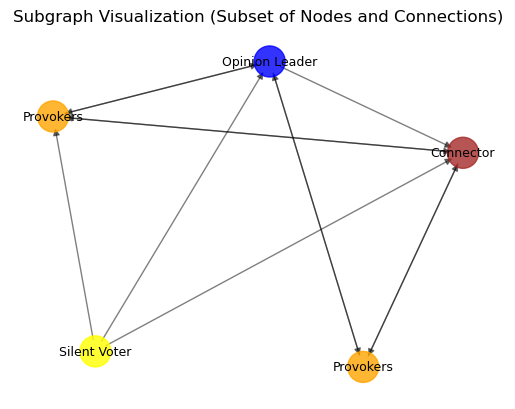

9


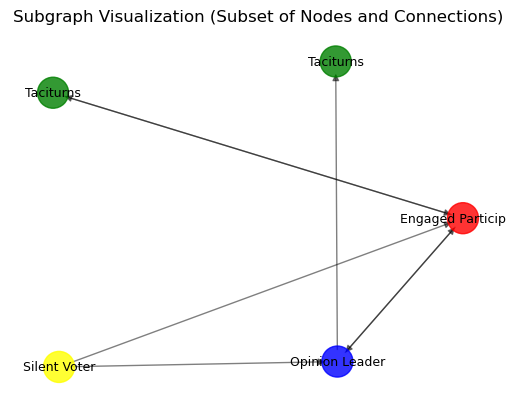

10


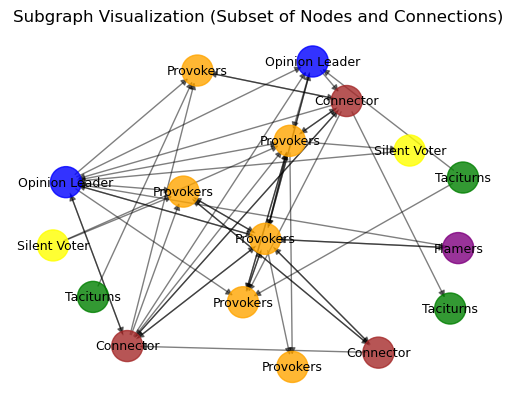

11


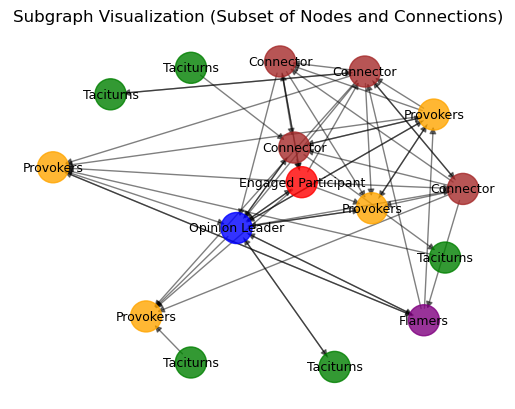

12


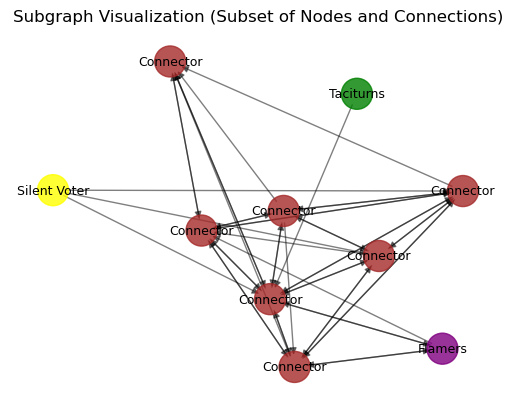

In [81]:
for ind,com in enumerate(comms[:13]):
    subgraph = G.subgraph(com)
    print(ind)
    visualize_subgraph(subgraph)